<a href="https://colab.research.google.com/github/nanda1296/Predictive-Analytics-for-Real-Estate/blob/Different_models/Project_Group_A13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Spring 2023 - AISC - Nest Analytics_Toronto_housing_data_Cleaned.xlsx')
df = df.drop(df.columns[0],axis=1)
df.head()

,Land Use,Property Address,Suite/ RESIDENTIAL CONDO#,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,1208 3RD AVE S,8,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,1802 STEWART PL,NaN,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,NaN,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,NaN,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [93]:
df.shape

(56636, 25)

In [94]:
#checking the data types of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Land Use                               56636 non-null  object        
 1   Property Address                       56477 non-null  object        
 2   Suite/ RESIDENTIAL CONDO#              6109 non-null   object        
 3   Sale Date                              56636 non-null  datetime64[ns]
 4   Sale Price                             56636 non-null  int64         
 5   Legal Reference                        56636 non-null  object        
 6   Sold As Vacant                         56636 non-null  object        
 7   Multiple Parcels Involved in Sale      56636 non-null  object        
 8   Owner Name                             25261 non-null  object        
 9   Address                                26017 non-null  object

In [95]:
#Checking for null values of each feature
df.isnull().sum().sort_values(ascending=False)

Suite/ RESIDENTIAL CONDO#                50527
Half Bath                                32490
Bedrooms                                 32477
Foundation Type                          32472
Grade                                    32471
Exterior Wall                            32471
Year Built                               32471
Finished Area                            32470
Full Bath                                32359
Owner Name                               31375
Land Value                               30619
Total Value                              30619
Building Value                           30619
Tax District                             30619
Neighborhood                             30619
Acreage                                  30619
Address                                  30619
Property Address                           159
Is (Property Address = Owner Address)        0
Multiple Parcels Involved in Sale            0
Sold As Vacant                               0
Legal Referen

In [96]:
#Checking for unique rows in each feature
df.nunique().sort_values(ascending=False)

Legal Reference                          52898
Property Address                         43179
Address                                  22327
Owner Name                               19713
Sale Price                                8085
Finished Area                             6117
Total Value                               5848
Building Value                            4406
Suite/ RESIDENTIAL CONDO#                 1475
Land Value                                1122
Sale Date                                 1117
Acreage                                    519
Neighborhood                               203
Year Built                                 126
Land Use                                    35
Grade                                       20
Bedrooms                                    12
Full Bath                                   11
Exterior Wall                               10
Tax District                                 7
Foundation Type                              6
Half Bath    

In [97]:
df.describe()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


#Data Exploration

<ipython-input-98-71efaa35b498>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Reds")


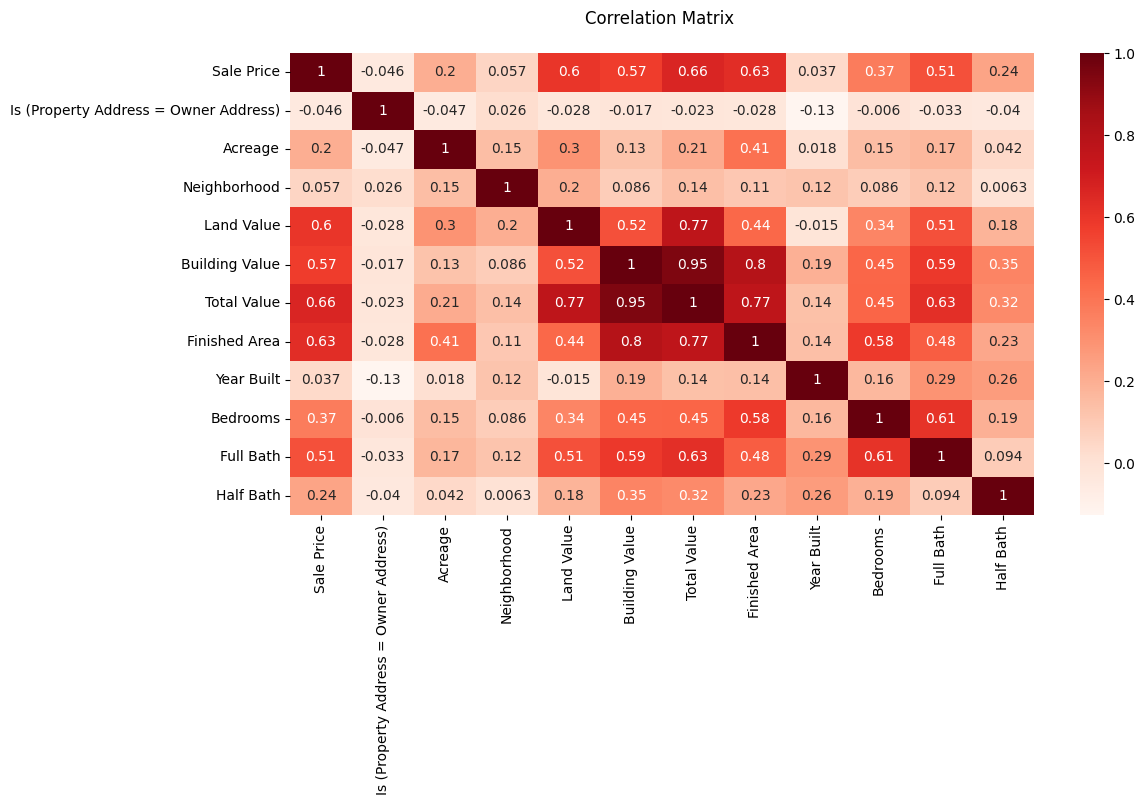

In [98]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.title('Correlation Matrix \n'.center(10))
plt.show()

In [99]:
df = df.drop(['Property Address','Suite/ RESIDENTIAL CONDO#','Legal Reference','Sale Date','Owner Name','Address'], axis=1)

In [100]:
col = list(df.columns)
categorical_features = []
numerical_features = []

for i in col:
        if df[i].dtype == 'object' or df[i].dtype == 'bool':
            categorical_features.append(i)
        else:
            numerical_features.append(i)

print('Categorical_Features: ', categorical_features)
print('Numerical_Features: ', numerical_features)

print('\nInference: The Dataset has {} categorical & {} numerical features.'.format(len(categorical_features),len(numerical_features)))

Categorical_Features:  ['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Is (Property Address = Owner Address)', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade']
Numerical_Features:  ['Sale Price', 'Acreage', 'Neighborhood', 'Land Value', 'Building Value', 'Total Value', 'Finished Area', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath']

Inference: The Dataset has 8 categorical & 11 numerical features.


In [101]:
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

In [102]:
df = df.dropna(axis='rows')
df.head()

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Is (Property Address = Owner Address),Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,132000,No,No,False,0.498903,URBAN SERVICES DISTRICT,4356.215782,69072.665027,160802.458969,232397.094246,1926.954345,CRAWL,1963.749224,BRICK,C,3.090029,1.886106,0.283981
1,SINGLE FAMILY,191500,No,No,True,0.170000,URBAN SERVICES DISTRICT,3127.000000,32000.000000,134400.000000,168300.000000,1149.000000,PT BSMT,1941.000000,BRICK,C,2.000000,1.000000,0.000000
2,SINGLE FAMILY,202000,No,No,True,0.110000,CITY OF BERRY HILL,9126.000000,34000.000000,157800.000000,191800.000000,2090.824950,SLAB,2000.000000,BRICK/FRAME,C,3.000000,2.000000,1.000000
3,SINGLE FAMILY,32000,No,No,True,0.170000,URBAN SERVICES DISTRICT,3130.000000,25000.000000,243700.000000,268700.000000,2145.600010,FULL BSMT,1948.000000,BRICK/FRAME,B,4.000000,2.000000,0.000000
4,SINGLE FAMILY,102000,No,No,True,0.340000,URBAN SERVICES DISTRICT,3130.000000,25000.000000,138100.000000,164800.000000,1969.000000,CRAWL,1910.000000,FRAME,C,2.000000,1.000000,0.000000


In [103]:
df.shape

(56636, 19)

**The Datset consists of 19 features and 56636 records after filling the null values**

In [105]:
#Checking for null values of each feature after data cleaning
df.isnull().sum()

Land Use                                 0
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Is (Property Address = Owner Address)    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Total Value                              0
Finished Area                            0
Foundation Type                          0
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 0
Full Bath                                0
Half Bath                                0
dtype: int64

#Exploratory Data Analysis (EDA)

In [ ]:
sns.set(style='whitegrid')
f,ax = plt.subplots(2,2,figsize = (16,12))

vis1 = sns.distplot(df['Sale Price'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][0])
vis2 = sns.distplot(df['Land Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][1])
vis3 = sns.distplot(df['Building Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][0])
vis4 = sns.distplot(df['Total Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][1])

plt.show()

In [ ]:
def scatter_df():
  for feature in numerical_features:
    if feature != 'Sale Price':
      plot = sns.scatterplot(x=df[feature], y=df['Sale Price'])
      plt.title('{} / Sale Price'.format(feature), fontsize = 16)
      plt.show()

scatter_df()

In [106]:
df['Land Use'].value_counts()

SINGLE FAMILY                                 34268
RESIDENTIAL CONDO                             14428
VACANT RESIDENTIAL LAND                        5164
DUPLEX                                         1389
ZERO LOT LINE                                  1049
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
SPLIT CLASS                                      17
VACANT COMMERCIAL LAND                           17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARSONAGE                                         6
GREENBELT/RES_x000D_\nGRRENBELT/RES               3
DAY CARE CENTER                                   2
NON-PROFIT C

In [107]:
df['Tax District'].value_counts()

URBAN SERVICES DISTRICT      50645
GENERAL SERVICES DISTRICT     4556
CITY OF FOREST HILLS           407
CITY OF OAK HILL               393
CITY OF GOODLETTSVILLE         379
CITY OF BELLE MEADE            235
CITY OF BERRY HILL              21
Name: Tax District, dtype: int64

In [108]:
df['Foundation Type'].value_counts()

CRAWL        47861
FULL BSMT     3917
PT BSMT       3200
SLAB          1581
TYPICAL         40
PIERS           37
Name: Foundation Type, dtype: int64

In [109]:
df['Exterior Wall'].value_counts()

BRICK           44413
FRAME            8870
BRICK/FRAME      2602
STONE             331
STUCCO            168
CONC BLK          113
FRAME/STONE       108
LOG                15
METAL              15
PRECAST CONC        1
Name: Exterior Wall, dtype: int64

In [110]:
df['Grade'].value_counts()

C       49733
B        3698
D        1984
A         598
X         523
E          60
TCC        20
IDC         3
AAB         3
AAC         3
OFC         2
SRC         1
SSC         1
SRD         1
TFC         1
TCB         1
TAC         1
OMB         1
OFB         1
TCD         1
Name: Grade, dtype: int64

In [111]:
#One-hot encoding the categorical columns

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', min_frequency=500)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_features]))
OH_cols.index = df.index
df2 = df.drop(categorical_features, axis=1)
df = pd.concat([df2, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [112]:
df.shape

(56636, 41)

In [113]:
df.columns

Index([    'Sale Price',        'Acreage',   'Neighborhood',     'Land Value',
       'Building Value',    'Total Value',  'Finished Area',     'Year Built',
             'Bedrooms',      'Full Bath',      'Half Bath',                0,
                      1,                2,                3,                4,
                      5,                6,                7,                8,
                      9,               10,               11,               12,
                     13,               14,               15,               16,
                     17,               18,               19,               20,
                     21,               22,               23,               24,
                     25,               26,               27,               28,
                     29],
      dtype='object')

In [114]:
target= 'Sale Price'
X = df.drop([target], axis=1)
y = df[target]

In [115]:
X.columns = X.columns.astype(str)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Original set --> ', X.shape,y.shape, '\nTraining set --> ', X_train.shape,y_train.shape, '\nTesting set  --> ', X_test.shape,y_test.shape)

Original set -->  (56636, 40) (56636,) 
Training set -->  (45308, 40) (45308,) 
Testing set  -->  (11328, 40) (11328,)


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [118]:
# Scaling the numerical features using
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(['int','float']))
X_test_scaled = scaler.transform(X_test.select_dtypes(['int', 'float']))

In [119]:
#Linear Regression
model1 = LinearRegression()
lr = model1.fit(X_train_scaled, y_train)

In [120]:
print("LR Train R2 Score: ", lr.score(X_train_scaled, y_train))
print("LR Test R2 Score: ", lr.score(X_test_scaled, y_test))

LR Train R2 Score:  0.12398993914033751
LR Test R2 Score:  0.1326444888846452


In [121]:
y_pred_lr = model1.predict(X_test_scaled)

In [122]:
mae = mean_absolute_error(y_test, y_pred_lr)
print('Linear Regression MAE: ', mae)

Linear Regression MAE:  204173.62290015572


In [123]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [124]:
X_train_poly.shape

(45308, 861)

In [125]:
X_test_poly.shape

(11328, 861)

In [130]:
polymodel = LinearRegression()
pf = polymodel.fit(X_train_poly, y_train)

In [131]:
print("PLR Train R2 Score: ", pf.score(X_train_poly, y_train))
print("PLR Test R2 Score: ", pf.score(X_test_poly, y_test))

PLR Train R2 Score:  0.2313682805201006
PLR Test R2 Score:  -750505656.402976


In [142]:
ridge = Ridge(alpha=1)
rd = ridge.fit(X_train_poly, y_train)

In [143]:
print("RidgeReg Train R2 Score: ", rd.score(X_train_poly, y_train))
print("RidgeReg Test R2 Score: ", rd.score(X_test_poly, y_test))

RidgeReg Train R2 Score:  0.23135145710167426
RidgeReg Test R2 Score:  0.18576995820314035


In [144]:
y_pred_rd = ridge.predict(X_test_poly)

In [145]:
mae_rd = mean_absolute_error(y_test, y_pred_rd)
print('Ridge Regression MAE: ', mae_rd)

Ridge Regression MAE:  175004.7933725248


In [146]:
lasso = Lasso(alpha=1)
ls = lasso.fit(X_train_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.571e+16, tolerance: 4.093e+12
  model = cd_fast.enet_coordinate_descent(


In [147]:
print("Lasso Train R2 Score: ", ls.score(X_train_poly, y_train))
print("Lasso Test R2 Score: ", ls.score(X_test_poly, y_test))

Lasso Train R2 Score:  0.23113610606290025
Lasso Test R2 Score:  0.19442603639392875


In [148]:
gbr = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.1, max_depth=2)
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=2500)

In [149]:
print("GB Train R2 Score: ", gbr.score(X_train_scaled, y_train))
print("GB Test R2 Score: ", gbr.score(X_test_scaled, y_test))

GB Train R2 Score:  0.24407136586112022
GB Test R2 Score:  0.23265555142821048


In [150]:
xgb = XGBRegressor(n_estimators=2500, learning_rate=0.5, n_jobs=5, reg_alpha=5)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=5, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [151]:
print("XGB R^2 Score: ", xgb.score(X_train_scaled, y_train))
print("XGB Test R^2 Score: ", xgb.score(X_test_scaled, y_test))

XGB R^2 Score:  0.26736757115363585
XGB Test R^2 Score:  0.24884958814068547


#Interpret model predictions with Lime

In [47]:
import lime
import lime.lime_tabular